<a href="https://colab.research.google.com/github/Karansingh005/New-York-Airbnb-Analysis/blob/master/New_York_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **New York City Airbnb Analysis**

### Importing all the required packages

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

*Reading the data*

In [3]:
df = pd.read_csv("/AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


*Information about the dataset*

In [4]:
df.count()

id                                48895
name                              48879
host_id                           48895
host_name                         48874
neighbourhood_group               48895
neighbourhood                     48895
latitude                          48895
longitude                         48895
room_type                         48895
price                             48895
minimum_nights                    48895
number_of_reviews                 48895
last_review                       38843
reviews_per_month                 38843
calculated_host_listings_count    48895
availability_365                  48895
dtype: int64

In [5]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [7]:
df.count()

id                                48895
name                              48879
host_id                           48895
host_name                         48874
neighbourhood_group               48895
neighbourhood                     48895
latitude                          48895
longitude                         48895
room_type                         48895
price                             48895
minimum_nights                    48895
number_of_reviews                 48895
last_review                       38843
reviews_per_month                 38843
calculated_host_listings_count    48895
availability_365                  48895
dtype: int64

### Cleaning of Data

In [8]:
df.dropna(subset=['last_review','reviews_per_month'],axis=0,inplace=True)
df.count()

id                                38843
name                              38837
host_id                           38843
host_name                         38827
neighbourhood_group               38843
neighbourhood                     38843
latitude                          38843
longitude                         38843
room_type                         38843
price                             38843
minimum_nights                    38843
number_of_reviews                 38843
last_review                       38843
reviews_per_month                 38843
calculated_host_listings_count    38843
availability_365                  38843
dtype: int64

### Segmentation of data for visualiztion of type of rooms

In [9]:
df_type_of_rooms = df['room_type'].value_counts()
df_type_of_rooms = pd.DataFrame({'Room Type': df_type_of_rooms.index,'Count': df_type_of_rooms.values})
df_type_of_rooms

,Room Type,Count
0,Entire home/apt,20332
1,Private room,17665
2,Shared room,846


### Pie-Chart visualization of types of rooms

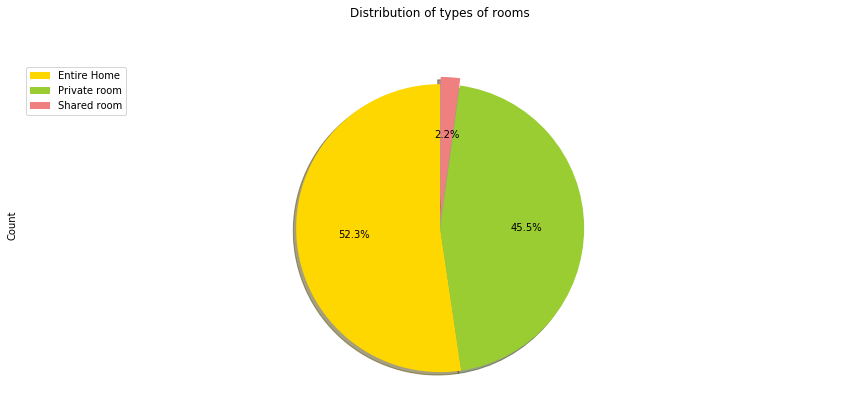

In [10]:
df_type_of_rooms['Count'].plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=None,
                               colors=['gold','yellowgreen','lightcoral'],
                               explode=[0,0,0.05]
                              )

plt.title('Distribution of types of rooms',y=1.12)
plt.axis('equal')
plt.legend(labels=['Entire Home','Private room','Shared room'],loc='upper left')
plt.show()

**Conclusion: Most of the people offer either a entire home or a private room** 

In [11]:
df_neighbourhood_group = df['neighbourhood_group'].value_counts()
df_neighbourhood_group = pd.DataFrame({'Neighbourhood': df_neighbourhood_group.index,'Count': df_neighbourhood_group.values})
df_neighbourhood_group

,Neighbourhood,Count
0,Manhattan,16632
1,Brooklyn,16447
2,Queens,4574
3,Bronx,876
4,Staten Island,314


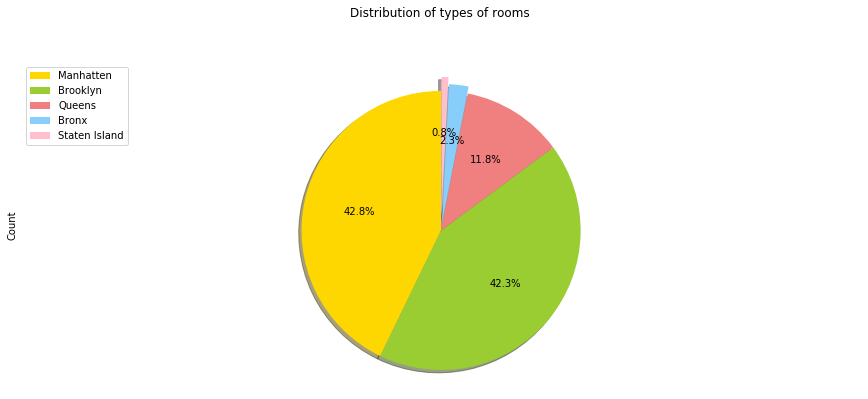

In [12]:
df_neighbourhood_group['Count'].plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=None,
                               colors=['gold','yellowgreen','lightcoral','lightskyblue','pink'],
                               explode=[0,0,0,0.05,0.1]
                              )

plt.title('Distribution of types of rooms',y=1.12)
plt.axis('equal')
plt.legend(labels=['Manhatten','Brooklyn','Queens','Bronx','Staten Island'],loc='upper left')
plt.show()

**Conclusion: More than half of the houses are based in either Manhatten or Brooklyn**

In [13]:
df_neighbourhood_group_price = df.groupby(['neighbourhood_group']).mean()
df_neighbourhood_group_price = df_neighbourhood_group_price['price']
df_neighbourhood_group_price = pd.DataFrame({'Neighbourhood': df_neighbourhood_group_price.index,'Price': df_neighbourhood_group_price.values})
df_neighbourhood_group_price.set_index('Neighbourhood')

,Price
Neighbourhood,
Bronx,79.553653
Brooklyn,121.448714
Manhattan,180.052489
Queens,95.762571
Staten Island,89.964968


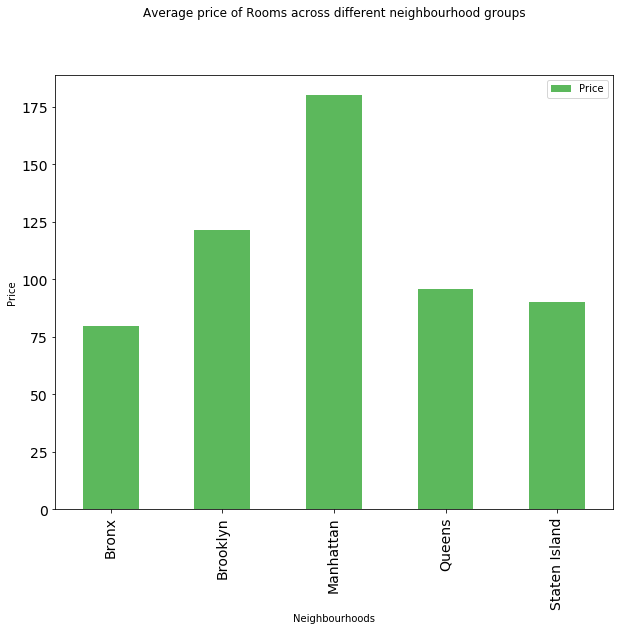

In [14]:
df_neighbourhood_group_price.plot(kind='bar',
                                 figsize=(10,8),
                                 width=0.5, 
                                 fontsize=14,     
                                 color = ['#5cb85c'])

plt.title('Average price of Rooms across different neighbourhood groups',y=1.12)
plt.xticks(df_neighbourhood_group_price.index,df_neighbourhood_group_price.Neighbourhood)
plt.xlabel('Neighbourhoods')
plt.ylabel('Price')
plt.show()

**Conclusion: Manhattan has the highest average price of 180$**

#### Number of each type of rooms in each Neighbourhood group

In [15]:
df_neighbourhood_1 = df.groupby(['neighbourhood_group','room_type'])
df_neighbourhood_1 = df_neighbourhood_1['id'].count()
df_neighbourhood_1 = df_neighbourhood_1.unstack(level=1)
df_neighbourhood_1

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,309,524,43
Brooklyn,8164,7993,290
Manhattan,9967,6309,356
Queens,1742,2680,152
Staten Island,150,159,5


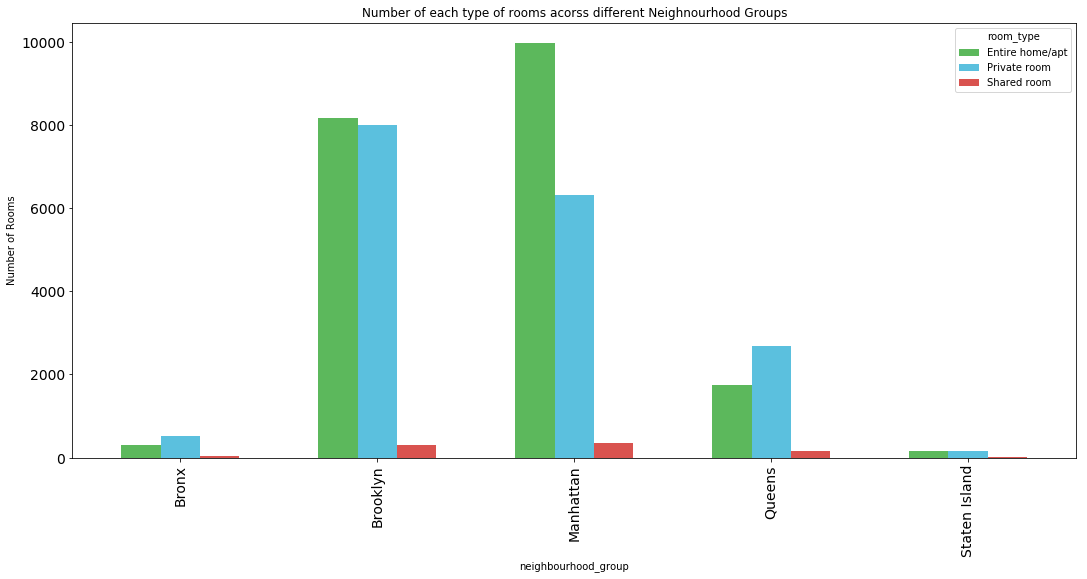

In [16]:
df_neighbourhood_1.plot(kind='bar',
                        figsize=(18,8),
                        width=0.6, 
                        fontsize=14,     
                        color = ['#5cb85c','#5bc0de','#d9534f'],
                        )
plt.title('Number of each type of rooms acorss different Neighnourhood Groups')
plt.ylabel('Number of Rooms')
plt.show()

#### Average price of each type of room in different neighbourhood

In [17]:
df_neighbourhood_2 = df.groupby(['neighbourhood_group','room_type'])
df_neighbourhood_2 = df_neighbourhood_2['price'].mean()
df_neighbourhood_2 = df_neighbourhood_2.unstack(level=1)
df_neighbourhood_2.round(2)

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,120.79,57.09,56.93
Brooklyn,171.25,73.34,45.46
Manhattan,230.19,106.60,77.98
Queens,139.23,69.29,64.47
Staten Island,125.37,57.58,57.60


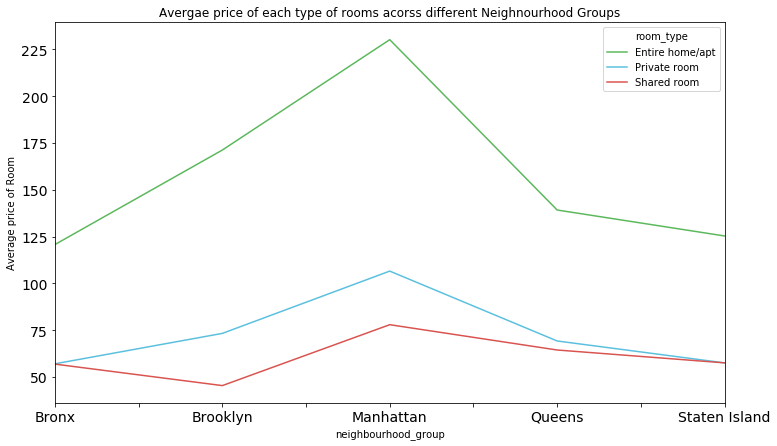

In [18]:
df_neighbourhood_2.plot(kind='line',
                       figsize=(12,7),
                       fontsize=14,
                       color = ['#5cb85c','#5bc0de','#d9534f'])

plt.title('Avergae price of each type of rooms acorss different Neighnourhood Groups')
plt.ylabel('Average price of Room')
plt.show()

#### Maximum price of each type of room across different neighbourhoods

In [20]:
df_neighbourhood_3 = df.groupby(['neighbourhood_group','room_type'])
df_neighbourhood_3 = df_neighbourhood_3['price'].max()
df_neighbourhood_3 = df_neighbourhood_3.unstack(level=1)
df_neighbourhood_3

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,670,300,800
Brooklyn,10000,7500,400
Manhattan,9999,9999,800
Queens,2600,10000,1800
Staten Island,625,235,150


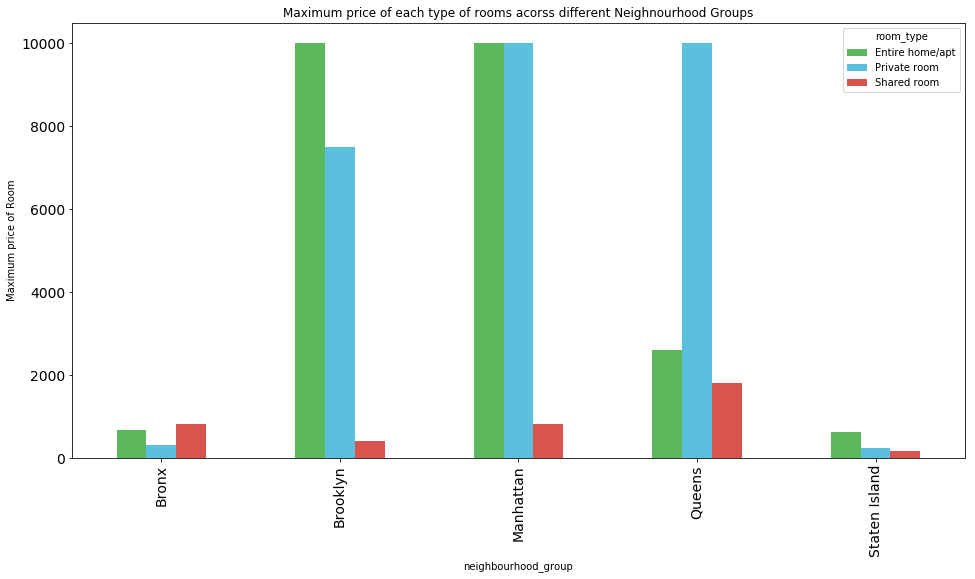

In [23]:
df_neighbourhood_3.plot(kind='bar',
                       figsize=(16,8),
                       fontsize=14,
                       color = ['#5cb85c','#5bc0de','#d9534f'])

plt.title('Maximum price of each type of rooms acorss different Neighnourhood Groups')
plt.ylabel('Maximum price of Room')
plt.show()